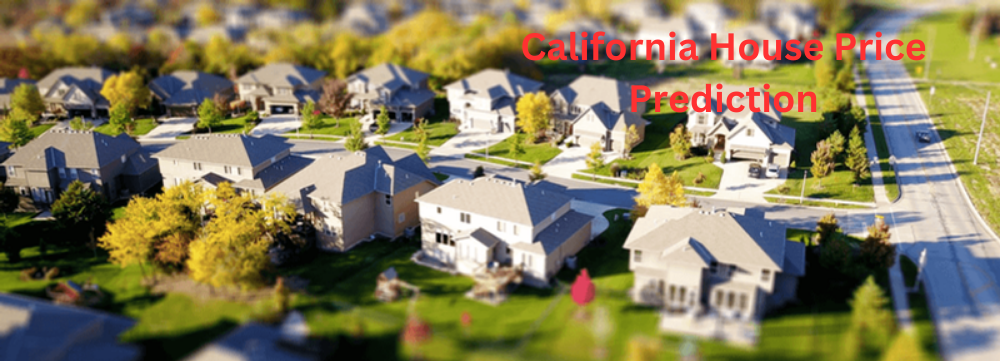

In [30]:
import pandas as pd
from IPython import display
display.Image("California Price Prediction.png")

In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [16]:
# Load the California Housing dataset
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['PRICE'] = california_housing.target

In [18]:
# Explore the dataset
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


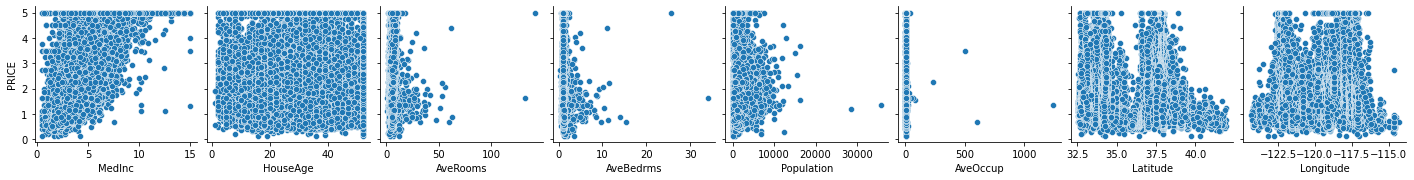

In [19]:
# Check for linearity and visualize the data
sns.pairplot(data, x_vars=data.columns[:-1], y_vars='PRICE', kind='scatter', diag_kind='kde')
plt.show()


In [20]:
# Check for homoscedasticity using residual plot
X = data.drop('PRICE', axis=1)
y = data['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
residuals = model.resid

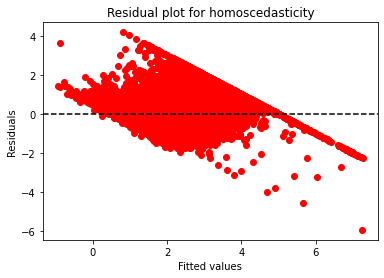

In [22]:
plt.scatter(model.predict(), residuals, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residual plot for homoscedasticity')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

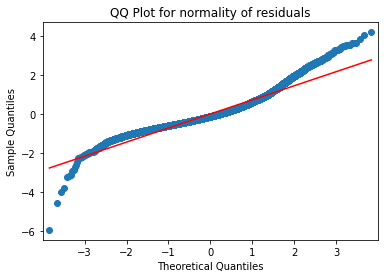

In [23]:
# Check for normality of residuals
sm.qqplot(residuals, line='s')
plt.title('QQ Plot for normality of residuals')
plt.show()

In [24]:
# Check for multicollinearity using variance inflation factor (VIF)
X_train_with_const = sm.add_constant(X_train)
vif = pd.DataFrame()
vif["Variable"] = X_train_with_const.columns
vif["VIF"] = [variance_inflation_factor(X_train_with_const.values, i) for i in range(X_train_with_const.shape[1])]
print(vif)

     Variable           VIF
0       const  16901.024982
1      MedInc      2.539815
2    HouseAge      1.237337
3    AveRooms      7.917240
4   AveBedrms      6.609200
5  Population      1.134824
6    AveOccup      1.009733
7    Latitude      9.206134
8   Longitude      8.875984


In [25]:
# If VIF values are high, consider removing one of the correlated variables
# Fit the linear regression model
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()


In [26]:
# Make predictions on the testing set
X_test_with_const = sm.add_constant(X_test)
y_pred = model.predict(X_test_with_const)

In [27]:
# Evaluate the model
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R-squared:', metrics.r2_score(y_test, y_pred))


Mean Squared Error: 0.5558915986952462
R-squared: 0.5757877060324494


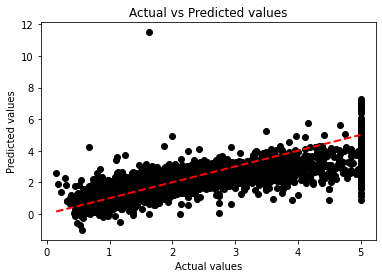

In [28]:
# Visualize the regression line
plt.scatter(y_test, y_pred, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs Predicted values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [29]:
# Interpretation of the linear regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3261.
Date:                Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:14:31   Log-Likelihood:                -17998.
No. Observations:               16512   AIC:                         3.601e+04
Df Residuals:                   16503   BIC:                         3.608e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.0233      0.728    -50.835      0.0